In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# local
from utils import get_frames, get_labels_df, SEQ_01, SEQ_02, SEQ_03

In [3]:
# Plan of action
# 1 Load images
# 2 match features in left and right images

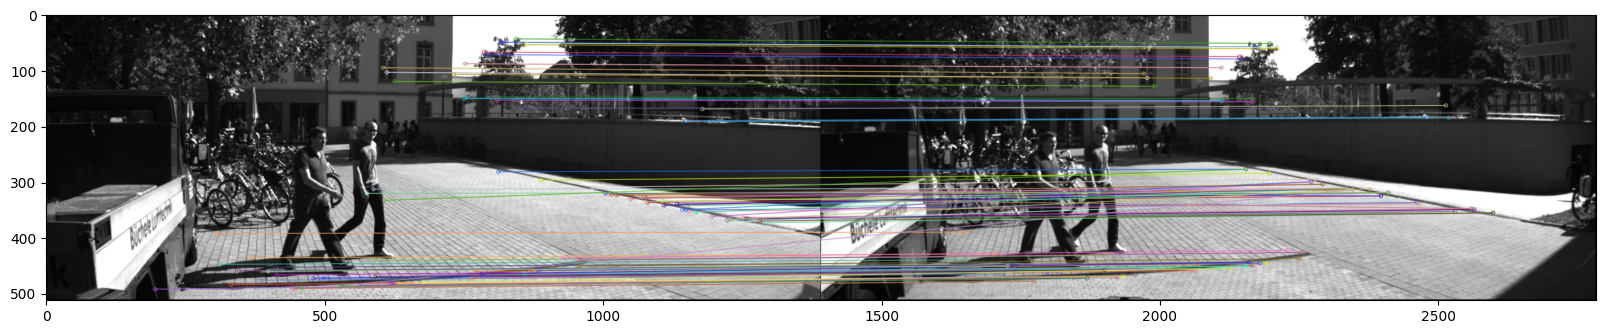

In [11]:
# Detecting features and matching them

# get frames from sequence 1
frame_num = 0
frame_r, frame_l = get_frames(frame_num, SEQ_01) # frames come already in RGB format

# feature detection
gray_r = cv.cvtColor(frame_r,cv.COLOR_RGB2GRAY)
gray_l = cv.cvtColor(frame_l,cv.COLOR_RGB2GRAY)

# match features between right and left frame with sift and brute force matcher
sift = cv.SIFT_create()
bf = cv.BFMatcher()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray_r,None)
kp2, des2 = sift.detectAndCompute(gray_l,None)

# match descriptors
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(gray_r,kp1,gray_l,kp2,matches[:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,20))
plt.imshow(img3)

In [ ]:
img = cv.imread('home.jpg')
gray_r= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray_r,None)
img=cv.drawKeypoints(gray_r,kp,img)
